In [ ]:
#!pip install googletrans==4.0.0rc1

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import json

from googletrans import Translator

In [156]:
df = pd.read_csv("datasets/Groceries_dataset.csv")

with open("config/github_access.json") as f:
  acces_to_github = json.load(f)

In [ ]:
df.shape

(38765, 3)

In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [173]:
class Processingdata:

  def __init__(self,df):
    self.df_original = df
    self.translator = Translator()
  
  def transform_columns(self,df):
    
    # str to column
    df["Date"] = pd.to_datetime(df["Date"]) 

    return df
  
  def translate_column(self,df,translator):
    
    dic_f = dict()
    lista_items = df["itemDescription"].unique().tolist()
    for item in lista_items:
      try:
        trans = translator.translate(item, src="en", dest='es').text
      except:
        trans = item  
        print(f"error en {item}")
      dic_f[item] = trans

    dic_f["pork"] = "cerdo"
    dic_f["turkey"] = "pavo"
    dic_f["cleaner"] = "limpiador"

    return dic_f

  def process(self):
    
    df_t = self.transform_columns(self.df_original)
    dic_f = self.translate_column(df_t,self.translator)
    df_clean = df_t.replace({"itemDescription":dic_f})
    self.df_clean = df_clean
    

In [174]:
clean = Processingdata(df)
clean.process()

error en pork
error en turkey
error en cleaner


In [175]:
clean.df_clean

,Member_number,Date,itemDescription
0,1808,2015-07-21,fruta tropical
1,2552,2015-05-01,leche entera
2,2300,2015-09-19,fruta
3,1187,2015-12-12,Otras verduras
4,3037,2015-01-02,leche entera
...,...,...,...
38760,4471,2014-08-10,queso en rodajas
38761,2022,2014-02-23,caramelo
38762,1097,2014-04-16,barra de pastel
38763,1510,2014-03-12,jugo de fruta/vegetal


Top de productos por consumo

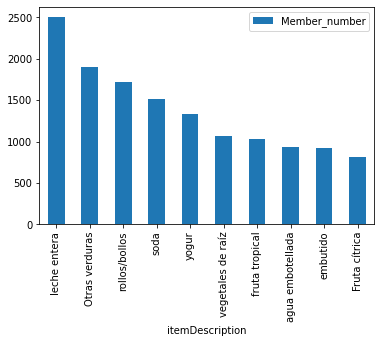

In [186]:
clean.df_clean.groupby("itemDescription").count()["Member_number"].reset_index().sort_values("Member_number",ascending=False).reset_index(drop=True).iloc[:10,:].plot.bar(x="itemDescription")

Top de Productos Menos comprados

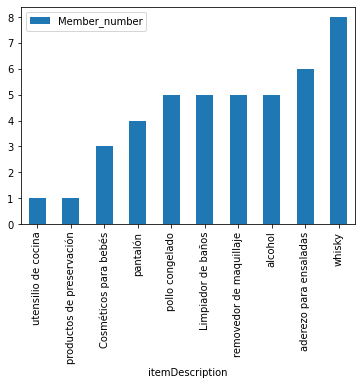

In [187]:
clean.df_clean.groupby("itemDescription").count()["Member_number"].reset_index().sort_values("Member_number").reset_index(drop=True).iloc[:10,:].plot.bar(x="itemDescription")